<a href="https://colab.research.google.com/github/DanRoBe/AnimeListAnalysis/blob/main/AnimeListAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis de listado de animes** 🎎

Para la realización de este análisis se ha empleado un dataset alojado en el siguiente link: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

El número de columnas es de 7

##Columnas##

*   **Anime_ID:** Cualitativa nominal (Código numérico de cada anime)
*   **Name:** Cualitativa nominal (Nombre del anime)
*   **Genre:** Cualitativa nominal (Géneros del anime)
*   **Type:** Cualitativa nominal (Formato)
*   **Episodes:** Cuantitativa discreta (Número de episodios)
*   **Rating:** Cuantitativa continua (Valoración promedio)
*   **Members:** Cuantitativa discreta (Número de miembros en la comunidad)

El número de registros es de 12294

# Primeros pasos


Importamos la librería Pandas, que será la que emplearemos para realizar el análisis exploratorio de los datos (EDA)

In [ ]:
import pandas as pd

A continuación tendremos que cargar el dataset. Lo haremos de dos formas diferentes, utilizando Google Drive y también mediante el archivo alojado en GitHub, que será el que se utilizará para el seguimiento del proceso desde esta plataforma. Llamaremos "anime" a nuestro dataframe.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# anime = pd.read_csv('/content/drive/MyDrive/CSV/anime.csv')

In [ ]:
anime = pd.read_csv('https://raw.githubusercontent.com/DanRoBe/AnimeListAnalysis/main/anime.csv')

A continuación, hacemos un print para visualizar el aspecto de nuestra tabla, y también un display para una vista más estructurada.

In [ ]:
print(anime)

       anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      

In [ ]:
display(anime)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


Podemos observar algunos registrios en las siete columnas. Describimos la denominada "genre", que puede ser una de las más interesantes de cara a análisis posteriores.

In [ ]:
anime['genre'].describe()

count      12232
unique      3264
top       Hentai
freq         823
Name: genre, dtype: object

Extraemos que hay un total de 3264 géneros diferentes, siendo 'Hentai' el más frecuente, repitiéndose 823 veces.

# Eliminación de valores nulos

A continuación procedemos a tratar los campos en los que tenemos algún elemento nulo o desconocido.

In [ ]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

 Haciendo un estudio de nuestro dataframe, nos damos cuenta de que hay valores que no aparecen como nulos usando el comando anterior, pero que sin embargo no aportan información valiosa puesto que están registrados como 'Unknown'. Esto sucede en la columna 'episodes'. Lo que haremos será convertirlos también a nulos para poder tratarlos con los demás.

In [ ]:
anime['episodes'] = anime['episodes'].replace('Unknown', None)

In [ ]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64

In [ ]:
display(anime['genre'][0])
type(anime['genre'][0])
#Más adelante habrá que transformar en lista, intentando ordenarlas alfabéticamente

'Drama, Romance, School, Supernatural'

str

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  11954 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
anime['name'][4] = anime['name'][4].replace('&#039','')
print(anime['name'][4])
#Para cambiar el nombre de algo en una columna

Gintama;


<ipython-input-10-2d03d72c0a3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime['name'][4] = anime['name'][4].replace('&#039','')


In [ ]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64

In [ ]:
anime['rating'].describe()

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

In [ ]:
anime.genre = anime.genre.fillna('Unknown')
anime.type = anime.type.fillna('Unknown')

In [ ]:
anime['episodes'].describe()

count     11954
unique      186
top           1
freq       5677
Name: episodes, dtype: object

In [ ]:
anime = anime.astype(dtype={'name':'string', 'genre':'string', 'type':'category', 'episodes':'float'})

In [ ]:
mediaEp = int(anime.episodes.mean())
anime.episodes = anime.episodes.fillna(mediaEp).astype('int')


In [ ]:
anime.episodes.describe()

count    12294.000000
mean        12.371970
std         46.212749
min          1.000000
25%          1.000000
50%          2.000000
75%         12.000000
max       1818.000000
Name: episodes, dtype: float64

In [ ]:
#Podríamos usar esto pero no queremos sobrestimar esos valores: anime.rating = anime.rating.fillna(anime.rating.mean())

In [ ]:
anime.isnull().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
anime.rating = anime.rating.fillna(-1)
#Utilizaremos esto para filtrar esos valores. También se podría hacer con None

In [ ]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [ ]:
display(anime)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
serieepisodes = anime.episodes.describe()
print(serieepisodes)
type(serieepisodes)

count    12294.000000
mean        12.371970
std         46.212749
min          1.000000
25%          1.000000
50%          2.000000
75%         12.000000
max       1818.000000
Name: episodes, dtype: float64


pandas.core.series.Series

In [ ]:
q1 = serieepisodes['25%']
q3 = serieepisodes['75%']
iqr = q3-q1
print(q1)
print(q3)
print(iqr)

1.0
12.0
11.0


In [ ]:
maximoepisodios = q3 + 1.5*iqr
minimoepisodios = q1 - 1.5*iqr

print('Valor "máximo" de episodios= ', maximoepisodios)
print('Valor "mínimo" de episodios= ', minimoepisodios, 'que sería 0')

Valor "máximo" de episodios=  28.5
Valor "mínimo" de episodios=  -15.5 que sería 0


In [ ]:
Filtro = anime['rating'] != -1
anime[Filtro]['rating'].mean()



6.473901690981432

In [ ]:
Filtro

0        True
1        True
2        True
3        True
4        True
         ... 
12289    True
12290    True
12291    True
12292    True
12293    True
Name: rating, Length: 12294, dtype: bool

In [ ]:
serieratingfiltrada = anime[Filtro]['rating'].describe()
print(serieratingfiltrada)


count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64


In [ ]:
q1rating = serieratingfiltrada['25%']
q3rating = serieratingfiltrada['75%']
iqrrating = q3rating-q1rating
print(q1rating)
print(q3rating)
print(iqrrating)

5.88
7.18
1.2999999999999998


In [ ]:
maximorating = q3rating + 1.5*iqrrating
minimorating = q1rating - 1.5*iqrrating

print('Valor "máximo" de ratings= ', maximorating)
print('Valor "mínimo" de ratings= ', minimorating)

Valor "máximo" de ratings=  9.129999999999999
Valor "mínimo" de ratings=  3.93


<Axes: >

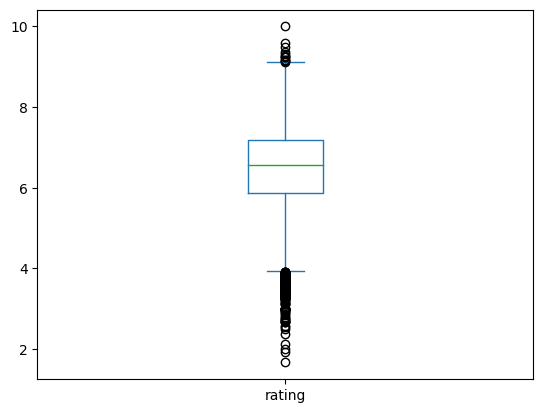

In [ ]:
filtrorating = anime[Filtro]['rating']
filtrorating.plot(kind='box')


In [ ]:
animeGood = anime[Filtro].copy()

In [ ]:
animeGood

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
filtroMin = animeGood['rating'] < minimorating
# filtroMax = anime[Filtro]['rating'] > maximorating
filtroMin

0        False
1        False
2        False
3        False
4        False
         ...  
12289    False
12290    False
12291    False
12292    False
12293    False
Name: rating, Length: 12064, dtype: bool

In [ ]:
animeGood[filtroMin]


,anime_id,name,genre,type,episodes,rating,members
8014,33394,Mahou Shoujo? Naria☆Girls,Magic,TV,12,3.91,3414
8015,28657,Red Colored Bridge,Psychological,Movie,1,3.90,450
8016,22377,Wonder Momo,"Action, Game, Martial Arts, School",ONA,5,3.90,3218
8017,29979,Petting a Dog,Slice of Life,ONA,1,3.88,375
8018,22173,Yume 10 Yoru,Dementia,Movie,1,3.88,317
...,...,...,...,...,...,...,...
12263,17825,Ikenai Boy: Ikasu Maruhi Hand Power,"Comedy, Hentai",OVA,1,3.11,112
12268,23677,Manga Edo Erobanashi,"Comedy, Hentai, Historical",OVA,5,2.86,111
12270,29994,Misato-chan no Yume Nikki,Hentai,OVA,1,3.00,147
12275,29111,Onna Spy Goumon: Teki no Ajito wa Jotai Goumonsho,Hentai,OVA,1,3.14,108


In [ ]:
filtroMax = anime[Filtro]['rating'] > maximorating
filtroMax

0         True
1         True
2         True
3         True
4         True
         ...  
12289    False
12290    False
12291    False
12292    False
12293    False
Name: rating, Length: 12064, dtype: bool

In [ ]:
animeGood[filtroMax]

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,12,9.60,47


In [ ]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
TablaGeneros = anime[['genre','name']].groupby(by=['genre']).count().sort_values(by=['name'],ascending=False).head(20)
display(TablaGeneros)

,name
genre,
Hentai,823
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
Dementia,137
"Fantasy, Kids",128
Fantasy,114
"Comedy, Kids",112


In [ ]:
import plotly.express as px

In [ ]:
px.line(TablaGeneros)

In [ ]:
TablaRating = anime[Filtro][['genre','rating']].groupby(by=['genre']).mean().sort_values(by=['rating'],ascending=False)
display(TablaRating)

,rating
genre,
"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26
"Drama, Fantasy, Romance, Slice of Life, Supern...",9.06
"Drama, School, Shounen",9.05
"Action, Drama, Mecha, Military, Sci-Fi, Super ...",8.98
"Adventure, Drama, Supernatural",8.93
...,...
"Action, Demons, Seinen, Super Power",3.32
"Kids, Mecha",3.26
"Action, Adventure, Sci-Fi, Space, Super Power",3.25


In [ ]:
Grafico = px.histogram(TablaRating, y = 'rating', x = TablaRating.index)
Grafico.update_layout(yaxis_range=[8,9.5])

In [ ]:
TablaRating.iloc[10:20]
Select rows 10-20.

SyntaxError: ignored